### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

### UDF's

In [10]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [12]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [13]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### data import and inspection 

In [2]:
# Load the data
hr_df = pd.read_csv('D:/SampleData/HR_attrition_data.csv' )

In [7]:
# list all columns
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [20]:
# meta data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
hr_df.select_dtypes(['int64', 'float64']).apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
satisfaction_level,14999.0,0.0,9191.89,0.612834,0.64,0.248631,0.061817,0.09,0.09,0.11,0.21,0.44,0.64,0.82,0.92,0.96,0.99,1.0
last_evaluation,14999.0,0.0,10740.81,0.716102,0.72,0.171169,0.029299,0.36,0.39,0.46,0.49,0.56,0.72,0.87,0.95,0.98,1.00,1.0
number_project,14999.0,0.0,57042.00,3.803054,4.00,1.232592,1.519284,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,7.00,7.0
average_montly_hours,14999.0,0.0,3015554.00,201.050337,200.00,49.943099,2494.313175,96.00,104.00,130.00,137.00,156.00,200.00,245.00,267.00,275.00,301.00,310.0
time_spend_company,14999.0,0.0,52470.00,3.498233,3.00,1.460136,2.131998,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,10.00,10.0
Work_accident,14999.0,0.0,2169.00,0.144610,0.00,0.351719,0.123706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
left,14999.0,0.0,3571.00,0.238083,0.00,0.425924,0.181411,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
promotion_last_5years,14999.0,0.0,319.00,0.021268,0.00,0.144281,0.020817,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company
> dependant variable is **left**

In [24]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [25]:
for c_feature in categorical_features:
    hr_df = create_dummies(hr_df, c_feature )

In [26]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [28]:
# get all the feature variables
feature_columns = hr_df.columns.difference( ['left'] )

In [29]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

### data split for training and testing

In [30]:
# import the package
from sklearn.model_selection import train_test_split

# get training and testing datasets
train_X, test_X, train_y, test_y = train_test_split(hr_df[feature_columns], 
                                                        hr_df['left'], 
                                                        test_size = 0.3,
                                                        random_state = 123)

### build logistic regression model

In [31]:
# Building Models
from sklearn.linear_model import LogisticRegression

In [32]:
# initialize the model
logreg = LogisticRegression()

In [34]:
# fit the model
logreg.fit(train_X, train_y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
# predict the values for training
logreg.predict(train_X)   # by default, it use cut-off as 0.5

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
# get the coefficients for reference
pd.DataFrame(index = pd.Series(feature_columns), data = logreg.coef_[0], columns = ['coefficient'])

,coefficient
Work_accident_1,-1.533474
average_montly_hours,0.004234
department_RandD,-0.478125
department_accounting,0.135990
department_hr,0.342942
department_management,-0.476742
department_marketing,0.088755
department_product_mng,-0.102437
department_sales,0.061301
department_support,0.076968


In [56]:
# get the value of intercept
logreg.intercept_

array([-1.39156676])

In [219]:
# Predicting on the training data
hr_train_pred = pd.DataFrame(train_y)
hr_train_pred['predicted'] = logreg.predict(train_X)

In [220]:
# Comparing the predictions with actual test data
hr_train_pred.head(5)

,left,predicted
5242,0,0
12674,1,0
6924,0,1
12595,1,1
13482,0,0


In [221]:
# Predicting on the test data
hr_test_pred = pd.DataFrame(test_y)
hr_test_pred['predicted'] = logreg.predict(test_X)

In [222]:
# Comparing the predictions with actual test data
hr_test_pred.head()

,left,predicted
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0


In [223]:
# Creating a confusion matrix
from sklearn import metrics
cm = pd.DataFrame(metrics.confusion_matrix(hr_test_pred.left, hr_test_pred.predicted, [1, 0]))
cm

,0,1
0,349,722
1,228,3201


In [224]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

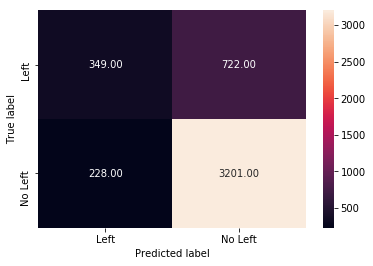

In [225]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [260]:
# get train and test accuracy score
print('Train Accuracy: ', metrics.accuracy_score(hr_train_pred.left, hr_train_pred.predicted).round(4))
print('Test Accuracy: ', metrics.accuracy_score(hr_test_pred.left, hr_test_pred.predicted).round(4))

Train Accuracy:  0.7873
Test Accuracy:  0.7889


Overall test accuracy is 79%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [227]:
# How good the model is?
predict_proba_train = pd.DataFrame(logreg.predict_proba(train_X)).iloc[:, 1]
predict_proba_test = pd.DataFrame(logreg.predict_proba(test_X)).iloc[:, 1]

In [259]:
# get train and test auc score
print('Train AUC: ', metrics.roc_auc_score(hr_train_pred.left, predict_proba_train).round(4))
print('Test AUC: ', metrics.roc_auc_score(hr_test_pred.left, predict_proba_test).round(4))

Train AUC:  0.8226
Test AUC:  0.8191


### Building Decision Tree Model

In [234]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [244]:
# initalize and build the model
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree = clf_tree.fit( train_X, train_y )

In [263]:
# predict the values
train_y_predict = clf_tree.predict(train_X)
test_y_predict = clf_tree.predict(test_X)

In [264]:
# get the accuracy score for the training and testing

print('Train Accuracy: ', metrics.accuracy_score(train_y, train_y_predict).round(4))
print('Test Accuracy: ', metrics.accuracy_score(test_y, test_y_predict).round(4))

Train Accuracy:  0.9709
Test Accuracy:  0.9656


In [265]:
# get the probability score on training and testing
train_predict_prob = pd.DataFrame(clf_tree.predict_proba(train_X))[1]
test_predict_prob = pd.DataFrame(clf_tree.predict_proba(test_X))[1]

In [266]:
# get train and test auc score
print('Train AUC: ', metrics.roc_auc_score(hr_train_pred.left, train_predict_prob).round(4))
print('Test AUC: ', metrics.roc_auc_score(hr_test_pred.left, test_predict_prob).round(4))

Train AUC:  0.9728
Test AUC:  0.9699


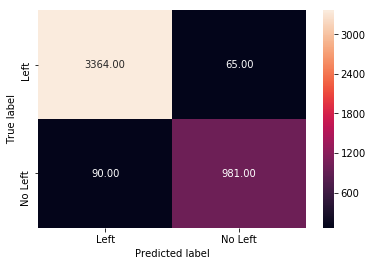

In [269]:
# confusion metrix for test data
tree_cm = metrics.confusion_matrix(test_y, test_y_predict)
sn.heatmap(tree_cm, annot = True, fmt = '.2f',
                xticklabels = ["Left", "No Left"] , 
                    yticklabels = ["Left", "No Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Fine Tuning the parameters

In [292]:
param_grid = {'max_depth': np.arange(8, 13), 
                 'max_features': np.arange(8, 19)}

In [297]:
tree = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid, cv = 5, scoring = 'roc_auc')
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 8,  9, 10, 11, 12]), 'max_features': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [298]:
# get the best score and parameters
print('Best score: ', tree.best_score_)
print('Best parameters: ', tree.best_params_)

Best score:  0.9789780175429614
Best parameters:  {'max_depth': 8, 'max_features': 8}


In [299]:
# build the decision tree model with the best parameter combinations
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features = 8)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [301]:
# get the model accuracy
print(metrics.accuracy_score(train_y, clf_tree.predict(train_X)))
print(metrics.accuracy_score(test_y, clf_tree.predict(test_X)))

0.9829507572149728
0.9764444444444444


In [304]:
# get the probability score on training and testing
train_predict_prob = pd.DataFrame(clf_tree.predict_proba(train_X))[1]
test_predict_prob = pd.DataFrame(clf_tree.predict_proba(test_X))[1]

In [309]:
# get the model auc after parameter tuning
print(metrics.roc_auc_score(train_y, train_predict_prob))
print(metrics.roc_auc_score(test_y, test_predict_prob))

0.9929893736717089
0.9832416100492886


---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

In [ ]:
from IPython.display import Image
Image(filename='crowdflower_ensembling.jpg')

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

---
**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

In [351]:
import sklearn.ensemble as en

In [353]:
print([x for x in dir(en) if not x.startswith('_')])

['AdaBoostClassifier', 'AdaBoostRegressor', 'BaggingClassifier', 'BaggingRegressor', 'BaseEnsemble', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'IsolationForest', 'RandomForestClassifier', 'RandomForestRegressor', 'RandomTreesEmbedding', 'VotingClassifier', 'bagging', 'base', 'forest', 'gradient_boosting', 'iforest', 'partial_dependence', 'voting_classifier', 'weight_boosting']


### Bagged decision trees

In [354]:
from sklearn.ensemble import BaggingClassifier

In [355]:
bagclm = BaggingClassifier(oob_score = True, n_estimators = 100, verbose = True, n_jobs = -1)
bagclm.fit(train_X, train_y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.3s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [356]:
bagclm.predict(train_X)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished


array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [357]:
bagclm.oob_score_

0.9881893513667969

In [358]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


In [359]:
# get the feature columns used for the modelling
bagclm.estimators_features_[:5]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17])]

In [360]:
print(metrics.accuracy_score( y_pred.actual, y_pred.predicted ))
print(metrics.roc_auc_score( y_pred.actual, y_pred.predicted ))

0.9877777777777778
0.9817069434948084


Text(0.5, 15.0, 'Predicted label')

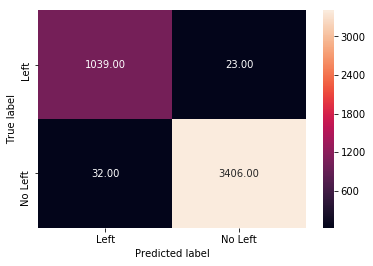

In [361]:
tree_bg = metrics.confusion_matrix( y_pred.predicted,
                                 y_pred.actual,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

----
## Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [362]:
# compute the out-of-bag accuracy for B=500
bagclm.oob_score_

0.9881893513667969

In [367]:
pargrid_bagging = {'n_estimators': [70, 80, 90, 100, 120, 150]}
gscv_bagging = GridSearchCV(estimator = BaggingClassifier(), 
                        param_grid = pargrid_bagging, 
                        cv = 5,
                        verbose = True, n_jobs = -1)

In [368]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.2s finished


In [369]:
gscv_results.best_params_

{'n_estimators': 80}

In [370]:
gscv_results.best_score_

0.9878083627012096

## Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

# BUILDING RANDOM FOREST MODEL

Random Forests is a **slight variation of bagged trees** that has even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

## Comparing Random Forests with decision trees

**Advantages of Random Forests:**

- Performance is competitive with the best supervised learning methods
- Provides a more reliable estimate of feature importance
- Allows you to estimate out-of-sample error without using train/test split or cross-validation

**Disadvantages of Random Forests:**

- Less interpretable
- Slower to train
- Slower to predict

In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
radm_clf = RandomForestClassifier(oob_score = True, n_estimators = 100 , max_features = 6, n_jobs = -1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [373]:
radm_clf.n_features_

18

In [374]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [375]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )
metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9843610234995137

Text(0.5, 15.0, 'Predicted label')

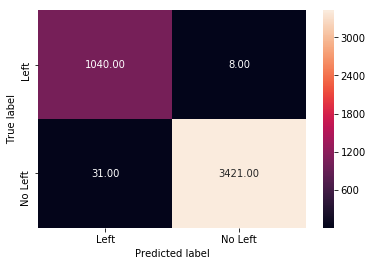

In [376]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [377]:
radm_clf.feature_importances_

array([0.00525229, 0.1442004 , 0.00108576, 0.00136608, 0.00126377,
       0.00151612, 0.00124142, 0.00071712, 0.00295467, 0.00261652,
       0.00334935, 0.12144891, 0.17134389, 0.00124481, 0.00504513,
       0.00327843, 0.34651235, 0.18556299])

In [378]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

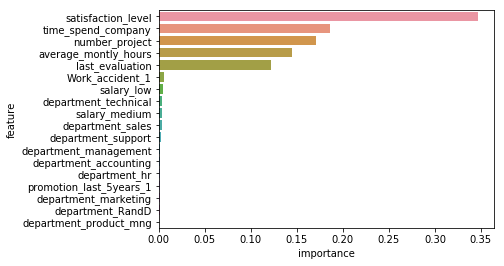

In [379]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, the most important features which influence whether to leave the company,in descending order, are

- satisfaction_level
- number_project
- time_spend_company
- last_evaluation
- average_montly_hours
- work_accident

In [380]:
pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120, 150, 200],
                  'max_features': [5, 6, 7, 8, 9, 10]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  2.3min finished


In [381]:
gscv_results.best_params_

{'max_features': 7, 'n_estimators': 120}

In [382]:
gscv_results.best_score_

0.9892370701971617

### Boosting

#### Ada Boosting

In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [103]:
pargrid_ada = {'n_estimators': [50, 70, 90, 100, 200],
                   'learning_rate': [10 ** x for x in range(-3, 1)]}

In [104]:
gscv_ada = GridSearchCV(estimator = AdaBoostClassifier(), 
                        param_grid = pargrid_ada, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

In [107]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 70, 90, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [108]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [109]:
clf_ada = gscv_ada.best_estimator_

In [110]:
gscv_ada.best_score_

0.9619011334412801

In [111]:
ad = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 800)
ad.fit(train_X, train_y )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=800, random_state=None)

In [12]:
#Graidient Boost Classifier
#xgboost
#from sklearn import xgboost
from xgboost import XGBClassifier